#Deep Autoencoders

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


##Batch normalization

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import BatchNormalization
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

inpt_dim =  512
ltnt_dim = 256

(x_train, y_train), (x_test, y_test) = imdb.load_data()
x_train = sequence.pad_sequences(x_train, maxlen=inpt_dim)
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# now with batch norm
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(ltnt_dim)(inpt_vec)
el2 = BatchNormalization()(el1)
encoder = Activation('sigmoid')(el2)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='sigmoid') (encoder)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

bn_loss = hist.history['loss']
bn_val_loss = hist.history['val_loss']

del autoencoder
del hist


# now without batch normalization
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(ltnt_dim)(inpt_vec)
encoder = Activation('sigmoid')(el1)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='sigmoid') (encoder)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

loss = hist.history['loss']
val_loss = hist.history['val_loss']

del autoencoder
del hist


x_train shape: (25000, 512)
x_test shape: (25000, 512)
25000 train samples
25000 test samples
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 92us/sample - loss: -31911.0847 - val_loss: -57737.5808
Epoch 2/20
25000/25000 [==============================] - 2s 75us/sample - loss: -106062.9816 - val_loss: -123789.1949
Epoch 3/20
25000/25000 [==============================] - 2s 74us/sample - loss: -191175.1112 - val_loss: -200827.2707
Epoch 4/20
25000/25000 [==============================] - 2s 76us/sample - loss: -282952.5310 - val_loss: -282130.9145
Epoch 5/20
25000/25000 [==============================] - 2s 74us/sample - loss: -376003.2371 - val_loss: -363298.6692
Epoch 6/20
25000/25000 [==============================] - 2s 76us/sample - loss: -468096.5652 - val_loss: -442944.9342
Epoch 7/20
25000/25000 [==============================] - 2s 80us/sample - loss: -558797.7147 - val_loss: -521450.8544
Epoch 8/20
25000/25000 [=

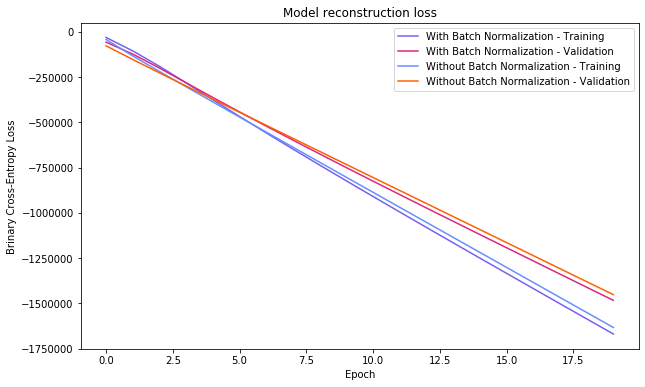

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(bn_loss, color='#785ef0')
plt.plot(bn_val_loss, color='#dc267f')
plt.plot(loss, color='#648fff')
plt.plot(val_loss, color='#fe6100')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['With Batch Normalization - Training', 
            'With Batch Normalization - Validation', 
            'Without Batch Normalization - Training', 
            'Without Batch Normalization - Validation'], loc='upper right')
plt.savefig('ch.8.ae.imdb.losses.png', dpi=350, bbox_inches='tight')
plt.show()


## Drop out

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

inpt_dim =  512
ltnt_dim = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data()
x_train = sequence.pad_sequences(x_train, maxlen=inpt_dim)
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# with dropout
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(inpt_dim/2)(inpt_vec)
el2 = Activation('relu')(el1)
el3 = Dropout(0.1)(el2)
el4 = Dense(ltnt_dim)(el3)
encoder = Activation('relu')(el4)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='relu') (encoder)


# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adagrad')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

bn_loss = hist.history['loss']
bn_val_loss = hist.history['val_loss']

del autoencoder
del hist


# now without dropout
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(inpt_dim/2)(inpt_vec)
el2 = Activation('relu')(el1)
el3 = Dense(ltnt_dim)(el2)
encoder = Activation('relu')(el3)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='relu') (encoder)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adagrad')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

loss = hist.history['loss']
val_loss = hist.history['val_loss']

del autoencoder
del hist


x_train shape: (25000, 512)
x_test shape: (25000, 512)
25000 train samples
25000 test samples
Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 2s 91us/sample - loss: -749.6457 - val_loss: -1411.8790
Epoch 2/100
25000/25000 [==============================] - 2s 75us/sample - loss: -2042.3615 - val_loss: -2210.7968
Epoch 3/100
25000/25000 [==============================] - 2s 75us/sample - loss: -2737.6785 - val_loss: -2745.1964
Epoch 4/100
25000/25000 [==============================] - 2s 77us/sample - loss: -3290.1337 - val_loss: -3209.9474
Epoch 5/100
25000/25000 [==============================] - 2s 77us/sample - loss: -3796.1145 - val_loss: -3577.0625
Epoch 6/100
25000/25000 [==============================] - 2s 82us/sample - loss: -4157.9676 - val_loss: -3889.4505
Epoch 7/100
25000/25000 [==============================] - 2s 77us/sample - loss: -4438.8802 - val_loss: -4108.2498
Epoch 8/100
25000/25000 [====================

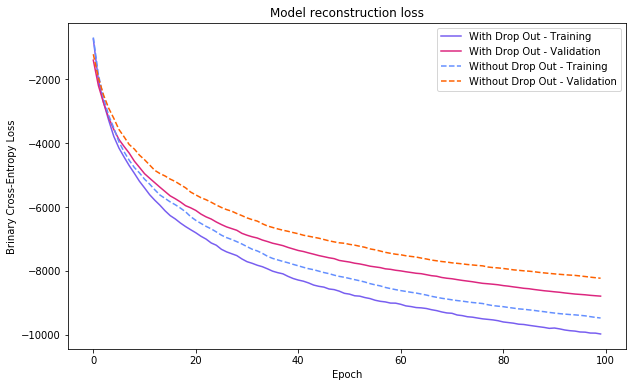

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(bn_loss, color='#785ef0')
plt.plot(bn_val_loss, color='#dc267f')
plt.plot(loss, '--', color='#648fff')
plt.plot(val_loss, '--', color='#fe6100')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['With Drop Out - Training', 
            'With Drop Out - Validation', 
            'Without Drop Out - Training', 
            'Without Drop Out - Validation'], loc='upper right')
plt.savefig('ch.8.ae.imdb.losses.dp.png', dpi=350, bbox_inches='tight')
plt.show()


##Exploring latent spaces with deep autoencoders

###CIFAR-10

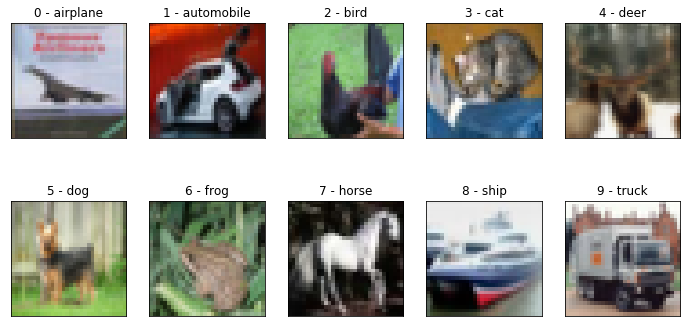

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

idx = [3, 6, 25, 0, 26, 24, 4, 13, 1, 11]
clsmap = {0: '0 - airplane',
          1: '1 - automobile', 
          2: '2 - bird', 
          3: '3 - cat', 
          4: '4 - deer',
          5: '5 - dog',
          6: '6 - frog',
          7: '7 - horse',
          8: '8 - ship',
          9: '9 - truck'}
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[idx].reshape(10, 32, 32, 3), y_test[idx])):
  plt.subplot(2, 5, 1 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(clsmap[y[0]])
plt.savefig('ch.8.cifar10.samples.png', bbox_inches='tight', dpi=350)
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.layers import BatchNormalization
import numpy as np

inpt_dim =  32*32*3
ltnt_dim = 64

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(2048)(inpt_vec)
el2 = Activation('relu')(el1)
el3 = Dense(1024)(el2)
el4 = BatchNormalization()(el3)
el5 = Activation('relu')(el4)
el6 = Dropout(0.2)(el5)

el7 = Dense(512)(el6)
el8 = Activation('relu')(el7)
el9 = Dense(256)(el8)
el10 = BatchNormalization()(el9)
el11 = Activation('relu')(el10)
el12 = Dropout(0.2)(el11)

el13 = Dense(128)(el12)
el14 = Activation('relu')(el13)
el15 = Dropout(0.2)(el14)
el16 = Dense(ltnt_dim)(el15)
el17 = BatchNormalization()(el16)
encoder = Activation('tanh')(el17)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dl1 = Dense(128)(encoder)
dl2 = BatchNormalization()(dl1)
dl3 = Activation('relu')(dl2)

dl4 = Dropout(0.2)(dl3)
dl5 = Dense(256)(dl4)
dl6 = Activation('relu')(dl5)
dl7 = Dense(512)(dl6)
dl8 = BatchNormalization()(dl7)
dl9 = Activation('relu')(dl8)

dl10 = Dropout(0.2)(dl9)
dl11 = Dense(1024)(dl10)
dl12 = Activation('relu')(dl11)
dl13 = Dense(2048)(dl12)
dl14 = BatchNormalization()(dl13)
dl15 = Activation('relu')(dl14)
decoder = Dense(inpt_dim, activation='sigmoid') (dl15)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

# setup RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6, )

# autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.compile(loss='binary_crossentropy', optimizer=opt)

hist = autoencoder.fit(x_train, x_train, epochs=200, batch_size=10000, 
                       shuffle=True, validation_data=(x_test, x_test))


x_train shape: (50000, 3072)
x_test shape: (10000, 3072)
Epoch 1/200
5/5 [==============================] - 2s 323ms/step - loss: 0.7133 - val_loss: 0.6928
Epoch 2/200
5/5 [==============================] - 1s 248ms/step - loss: 0.6716 - val_loss: 0.6952
Epoch 3/200
5/5 [==============================] - 1s 242ms/step - loss: 0.6561 - val_loss: 0.6965
Epoch 4/200
5/5 [==============================] - 1s 240ms/step - loss: 0.6501 - val_loss: 0.6988
Epoch 5/200
5/5 [==============================] - 1s 245ms/step - loss: 0.6452 - val_loss: 0.6987
Epoch 6/200
5/5 [==============================] - 1s 242ms/step - loss: 0.6417 - val_loss: 0.7026
Epoch 7/200
5/5 [==============================] - 1s 235ms/step - loss: 0.6393 - val_loss: 0.7030
Epoch 8/200
5/5 [==============================] - 1s 248ms/step - loss: 0.6381 - val_loss: 0.7065
Epoch 9/200
5/5 [==============================] - 1s 246ms/step - loss: 0.6355 - val_loss: 0.7078
Epoch 10/200
5/5 [==============================] - 

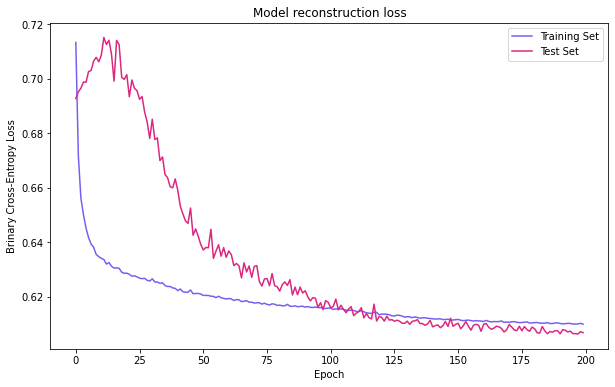

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.8.ae.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


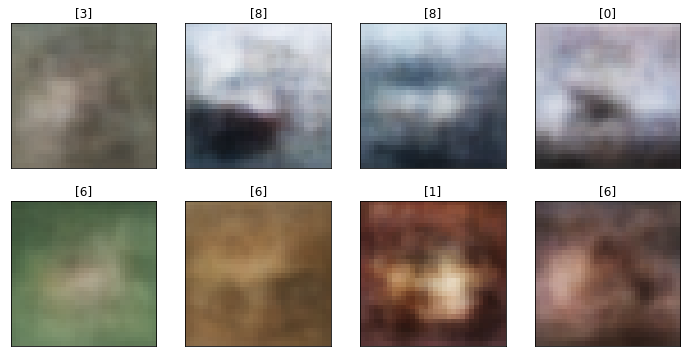

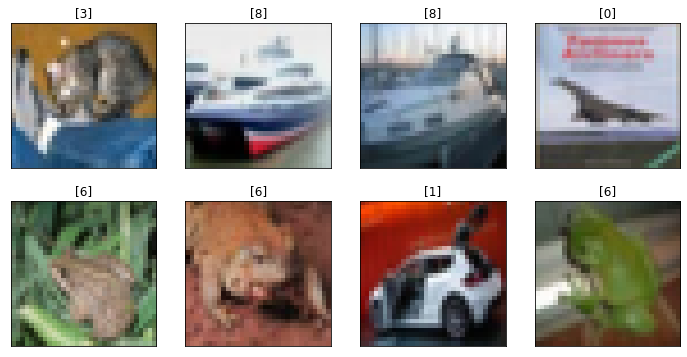

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 32, 32, 3), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.8.ae.cifar10.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[0:8].reshape(8, 32, 32, 3), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.8.ae.cifar10.original.png', bbox_inches='tight', dpi=350)
plt.show()

(10000, 64)


/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


(10000, 2)


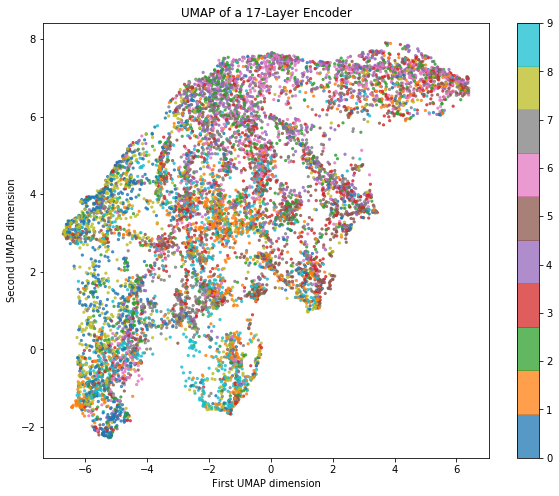

In [ ]:
import matplotlib.pyplot as plt
import umap

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

X_ = umap.UMAP().fit_transform(encdd)
print(X_.shape)


plt.figure(figsize=(10,8))
plt.title('UMAP of a 17-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First UMAP dimension')
plt.ylabel('Second UMAP dimension')
plt.colorbar()
plt.savefig('ch.8.ae.cifar10.umap.png', bbox_inches='tight', dpi=350)

### MNIST 

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.layers import BatchNormalization, MaxPooling1D
import numpy as np

inpt_dim =  28*28
ltnt_dim = 2

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))
print(x_train.shape)
print(x_test.shape)

inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(512)(inpt_vec)
el2 = Activation('relu')(el1)
el3 = Dense(512)(el2)
el4 = BatchNormalization()(el3)
el5 = Activation('relu')(el4)
el6 = Dropout(0.2)(el5)

el7 = Dense(256)(el6)
el8 = Activation('relu')(el7)
el9 = Dense(256)(el8)
el10 = BatchNormalization()(el9)
el11 = Activation('relu')(el10)
el12 = Dropout(0.2)(el11)

el13 = Dense(128)(el12)
el14 = Activation('relu')(el13)
el15 = Dropout(0.2)(el14)
el16 = Dense(ltnt_dim)(el15)
el17 = BatchNormalization()(el16)
encoder = Activation('tanh')(el17)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dl1 = Dense(128)(encoder)
dl2 = BatchNormalization()(dl1)
dl3 = Activation('relu')(dl2)

dl4 = Dropout(0.2)(dl3)
dl5 = Dense(256)(dl4)
dl6 = Activation('relu')(dl5)
dl7 = Dense(256)(dl6)
dl8 = BatchNormalization()(dl7)
dl9 = Activation('relu')(dl8)

dl10 = Dropout(0.2)(dl9)
dl11 = Dense(512)(dl10)
dl12 = Activation('relu')(dl11)
dl13 = Dense(512)(dl12)
dl14 = BatchNormalization()(dl13)
dl15 = Activation('relu')(dl14)
decoder = Dense(inpt_dim, activation='sigmoid') (dl15)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

# setup RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
# autoencoder.compile(loss='binary_crossentropy', optimizer=opt)

hist = autoencoder.fit(x_train, x_train, epochs=500, batch_size=10000, 
                       shuffle=True, validation_data=(x_test, x_test))


(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5728 - val_loss: 0.6840
Epoch 2/500
60000/60000 [==============================] - 0s 6us/sample - loss: 0.3407 - val_loss: 0.6391
Epoch 3/500
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2671 - val_loss: 0.5616
Epoch 4/500
60000/60000 [==============================] - 0s 7us/sample - loss: 0.2443 - val_loss: 0.4762
Epoch 5/500
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2333 - val_loss: 0.4065
Epoch 6/500
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2267 - val_loss: 0.3653
Epoch 7/500
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2221 - val_loss: 0.3402
Epoch 8/500
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2184 - val_loss: 0.3231
Epoch 9/500
60000/60000 [==============================] - 0s 6us/s

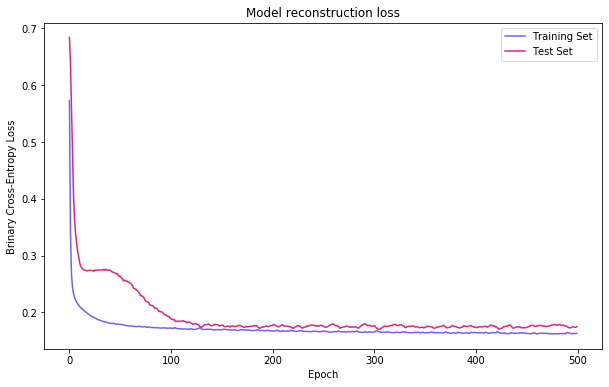

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.8.ae.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()


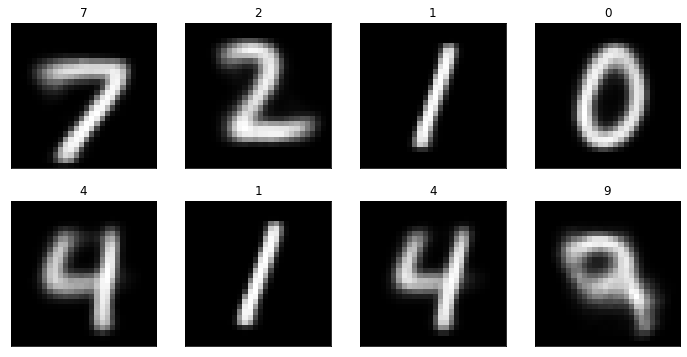

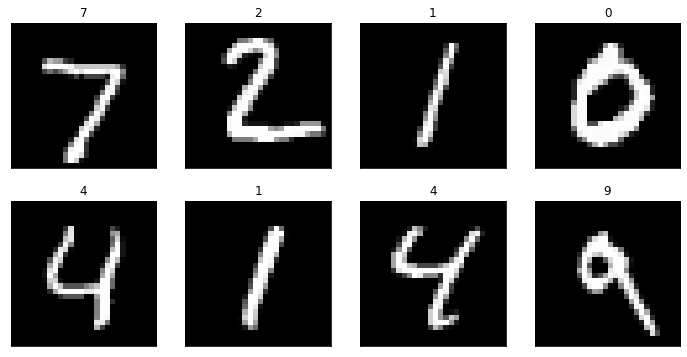

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.8.mnist.17l.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.8.mnist.original.png', bbox_inches='tight', dpi=350)
plt.show()

(10000, 2)


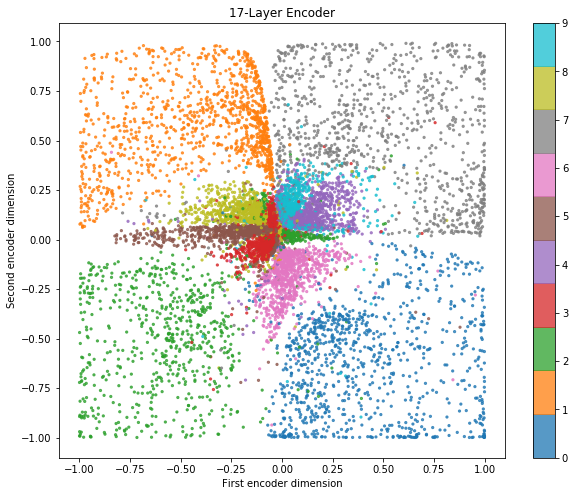

In [ ]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('17-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()
plt.savefig('ch.8.minist.17l.png', bbox_inches='tight', dpi=350)